In [4]:
#!pip install chembl_webresource_client

In [1]:
!pip install pyspark

  DEPRECATION: Building 'pyspark' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pyspark'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/434.2 MB ? eta -:--:--
     ---------------------------------------- 0.5/434.2 MB 4.2 MB/s eta 0:01:43
     ---------------------------------------- 1.3/434.2 MB 3.9 MB/s eta 0:01:50
     ---------------------------------------- 1.8/434.2 MB 4.0 MB/s eta 0:01:48
     ---------------------------------------- 3.1/434.2 MB 4.0 MB/s eta 0:01:48
     ---------------------------------------- 3.9/434.2 MB 4.1 MB/s eta 0:01:47
     ---------------------------------------- 5.0/434.2 MB 4.1 MB/s eta 0:01:44
      --------------------------------------- 5.5/434.2 MB 4.1 MB/s eta 0:01:45
      --------------------------------------- 6.3/434.2 MB 4.1 MB/s eta 0:01:46
      --------------------------------------- 7.1/434.2 MB 4.1 MB/s eta 0:01:45
      --------------------------------------- 7.9/434.2 MB 4.0 MB/s eta 0:01:48
      --------------------------------------- 8.7/434.2 MB 3.9 MB/s eta 0:01:49
      --------------------------------------- 9

In [ ]:
# PIPELINE TODO - data prep, wersje datasetów...

# pIC50

In [4]:
"""
Kroki które wykonamy żeby rozwiązać ten problem:
1. Jak zareprezentować te dane?
2. Analiza danych - zrozumieć wszystkie kolumny
3. Zrozumieć dane - najpierw co to za dane, potem jaki to problem
4. Zdefiniować kryterium sukcesu oraz jego miarę, zastanowić się nad metryką
5. EDA
6-9. Pętla while kryterium sukcesu, jeśli nie idzie to wracamy do pkt 4/5 Preprocessing, model selection, training, evaluation 
"""

'\nKroki które wykonamy żeby rozwiązać ten problem:\n1. Jak zareprezentować te dane?\n2. Analiza danych - zrozumieć wszystkie kolumny\n3. Zrozumieć dane - najpierw co to za dane, potem jaki to problem\n4. Zdefiniować kryterium sukcesu oraz jego miarę, zastanowić się nad metryką\n5. EDA\n6-9. Pętla while kryterium sukcesu, jeśli nie idzie to wracamy do pkt 4/5 Preprocessing, model selection, training, evaluation \n'

In [5]:
# aktywacja biologiczna molekuły po inpucie, wartość numeryczna, że to naprawdę to i jednostak 
# jawnie deklarować schemat df które wczytujemy

# EDA przygotowac, chociaż na części danych

In [6]:
from chembl_webresource_client.new_client import new_client

available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'chembl_release', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_classification', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


In [3]:
# znajdujemy wszystkie tabele, które mogą połączyć sięz molecules.all 
import pandas as pd
from chembl_webresource_client.new_client import new_client

# 1. Lista wszystkich dostępnych zasobów
available_resources = [resource for resource in dir(new_client)]

matching_resources = []
join_key = 'molecule_chembl_id'

print(f"Szukam zasobów zawierających klucz: {join_key}...\n")

for res_name in available_resources:
    try:
        # Pobieramy dynamicznie zasób
        resource = getattr(new_client, res_name)
        
        # Pobieramy 1 rekord, żeby sprawdzić jego kolumny (klucze)
        # Używamy filter, bo niektóre zasoby mogą być puste bez filtrów, ale .all()[0] zazwyczaj działa
        item = resource.all()[0]
        
        # Sprawdzamy czy klucz łączący jest w tym zasobie
        if join_key in item.keys():
            matching_resources.append(res_name)
            print(f"✅ {res_name:<20} -> MOŻNA ŁĄCZYĆ (zawiera {join_key})")
        else:
            print(f"❌ {res_name:<20} -> brak klucza (bezpośredniego)")
            
    except Exception as e:
        # Ignorujemy błędy pustych zasobów lub problemów z siecią
        pass

print("\n" + "="*50)
print(f"ZNALEZIONO {len(matching_resources)} ZASOBÓW DO POŁĄCZENIA Z MOLECULE:")
print(matching_resources)

Szukam zasobów zawierających klucz: molecule_chembl_id...

✅ activity             -> MOŻNA ŁĄCZYĆ (zawiera molecule_chembl_id)
✅ activity_supplementary_data_by_activity -> MOŻNA ŁĄCZYĆ (zawiera molecule_chembl_id)
❌ assay                -> brak klucza (bezpośredniego)
❌ assay_class          -> brak klucza (bezpośredniego)
❌ atc_class            -> brak klucza (bezpośredniego)
❌ binding_site         -> brak klucza (bezpośredniego)
✅ biotherapeutic       -> MOŻNA ŁĄCZYĆ (zawiera molecule_chembl_id)
❌ cell_line            -> brak klucza (bezpośredniego)
❌ chembl_id_lookup     -> brak klucza (bezpośredniego)
❌ chembl_release       -> brak klucza (bezpośredniego)
✅ compound_record      -> MOŻNA ŁĄCZYĆ (zawiera molecule_chembl_id)
✅ compound_structural_alert -> MOŻNA ŁĄCZYĆ (zawiera molecule_chembl_id)
❌ document             -> brak klucza (bezpośredniego)
❌ document_similarity  -> brak klucza (bezpośredniego)
✅ drug                 -> MOŻNA ŁĄCZYĆ (zawiera molecule_chembl_id)
✅ drug_indicat

In [ ]:
# 2. Teraz każdą z tych potencjalnie informatywnych tabel przygotujemy, poczyścimy

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from chembl_webresource_client.new_client import new_client
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
import time

# Wyłączamy ostrzeżenia dla czytelności outputu
warnings.filterwarnings('ignore')

def unpack_list_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Wykrywa kolumny zawierające listy i 'rozpakowuje' je do osobnych kolumn.
    Rozwiązuje problem 'unhashable type: list'.
    Np. col: [a, b] -> col_0: a, col_1: b
    """
    df_unpacked = df.copy()
    
    # Znajdujemy kolumny, które faktycznie zawierają listy (w dowolnym wierszu)
    cols_to_explode = []
    for col in df_unpacked.columns:
        # Sprawdzamy czy kolumna jest typu object (potencjalny kontener)
        if df_unpacked[col].dtype == 'object':
            # Sprawdzamy czy w kolumnie występuje jakakolwiek lista
            # Używamy apply i any, co jest bezpieczniejsze niż sprawdzanie tylko 1. wiersza
            if df_unpacked[col].apply(lambda x: isinstance(x, list)).any():
                cols_to_explode.append(col)

    if not cols_to_explode:
        print("   -> Nie znaleziono kolumn z listami do rozpakowania.")
        return df_unpacked

    for col in cols_to_explode:
        print(f"   -> Rozpakowywanie listy w kolumnie '{col}'...")
        try:
            # apply(pd.Series) zamienia listę w komórce na osobne kolumny
            # To operacja kosztowna, ale dla 10k wierszy akceptowalna
            expanded = df_unpacked[col].apply(pd.Series)
            
            # Jeśli lista była pusta lub same NaN, expanded może być puste
            if expanded.empty:
                df_unpacked.drop(columns=[col], inplace=True)
                continue

            # Nazywanie nowych kolumn (np. ligand_efficiency_0, ligand_efficiency_1)
            expanded.columns = [f"{col}_{i}" for i in expanded.columns]
            
            # Dołączenie nowych kolumn i usunięcie starej
            df_unpacked = pd.concat([df_unpacked, expanded], axis=1)
            df_unpacked.drop(columns=[col], inplace=True)
            print(f"      -> Utworzono {len(expanded.columns)} nowych kolumn.")
            
        except Exception as e:
            print(f"      Błąd przy rozpakowywaniu '{col}': {e}. Zamieniam na string.")
            # Fallback: jeśli rozpakowanie się nie uda, zamień na string (też rozwiąże problem unhashable)
            df_unpacked[col] = df_unpacked[col].astype(str)

    return df_unpacked
# ==========================================
# 1. FUNKCJE INSPEKCJI (OGLĄDANIE DANYCH)
# ==========================================

def inspect_basic_stats(df: pd.DataFrame):
    """Wyświetla podstawowe statystyki: head, shape, describe."""
    print(f"   Wymiary (Shape): {df.shape}")
    
    print("   Pierwsze 5 wierszy:")
    print(df.head())
    
    print("-" * 30)
    print("   Statystyki opisowe (Describe):")
    print(df.describe(include='all'))
    
    print("-" * 30)
    print("   Informację (Info):")
    df.info()



def print_unique_values(df: pd.DataFrame, max_unique=20):
    """
    Pętla po kolumnach wyświetlająca unikalne wartości.
    Zabezpieczenie: wyświetla tylko jeśli unikalnych jest mniej niż max_unique (żeby nie spamować).
    """
    print("nikalne wartości (dla zmiennych kategorycznych):")
    for column in df.columns:
        unique_count = df[column].nunique()
        # Wyświetlamy tylko, jeśli jest mało unikalnych wartości (cecha kategoryczna)
        if unique_count < max_unique:
            print(f"   Column: '{column}' ({unique_count} unique)")
            unique_values = df[column].unique()
            print(f"   Values: {unique_values}")
            print("-" * 30)

def check_missing_values(df: pd.DataFrame):
    """Sprawdza i printuje sumę braków danych."""
    missing = df.isna().sum()
    # Pokaż tylko te kolumny, które mają braki
    print(missing[missing > 0])
    print("-" * 30)

# ==========================================
# 2. FUNKCJE TRANSFORMACJI (PRZETWARZANIE)
# ==========================================

def convert_to_numeric_general(df: pd.DataFrame, numeric_candidates) -> pd.DataFrame:
    """
    Próbuje zamienić kolumny obiektowe na liczbowe.
    """

    df_num = df.copy()
    
    
    for col in df_num.columns:
        # Sprawdzamy czy nazwa kolumny sugeruje liczbę
        if any(candidate in col.lower() for candidate in numeric_candidates):
            try:
                # errors='coerce' zamieni błędy (tekst) na NaN
                df_num[col] = pd.to_numeric(df_num[col], errors='coerce')
                print(f"   -> Skonwertowano kolumnę '{col}' na numeric.")
            except:
                pass
    return df_num

def map_categorical_features(df: pd.DataFrame, mappings: dict) -> pd.DataFrame:
    """Mapuje wartości wg słownika (np. Yes->1, No->0)."""
    df_mapped = df.copy()
    for col, mapping in mappings.items():
        if col in df_mapped.columns:
            print(f"   -> Mapowanie kolumny '{col}'")
            df_mapped[col] = df_mapped[col].map(mapping)
    return df_mapped

def detect_and_encode_one_hot(df: pd.DataFrame, max_cardinality=20) -> pd.DataFrame:
    """
    Automatycznie wykrywa kolumny kategoryczne i robi One-Hot Encoding.
    Zamiast podawać listę ręcznie, znajdujemy kolumny typu 'object' z małą liczbą unikalnych wartości.
    """
    
    df_encoded = df.copy()
    
    # Znajdź kolumny tekstowe z małą liczbą unikalnych wartości
    categorical_cols = [col for col in df_encoded.columns 
                        if df_encoded[col].dtype == 'object' 
                        and df_encoded[col].nunique() <= max_cardinality]
    
    if categorical_cols:
        print(f"   -> Znaleziono do zakodowania: {categorical_cols}")
        df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True, dtype=int)
    else:
        print("   -> Brak kolumn do One-Hot Encoding.")
        
    return df_encoded

def remove_duplicates_general(df: pd.DataFrame) -> pd.DataFrame:
    """Usuwa duplikaty i resetuje indeks."""
    initial_rows = len(df)
    df_dedup = df.drop_duplicates().reset_index(drop=True)
    removed = initial_rows - len(df_dedup)
    print(f"   -> Usunięto {removed} duplikatów.")
    return df_dedup

# ==========================================
# 3. IMPUTACJA, wizualizacjam, wybór kolumm
# ==========================================

def impute_missing_values_iterative(df: pd.DataFrame) -> pd.DataFrame:
    """IterativeImputer dla liczb."""
    df_imputed = df.copy()
    
    numeric_cols = df_imputed.select_dtypes(include=[np.number]).columns
    # Wybieramy kolumny, które mają NaN ORAZ jakieś dane (nie same NaN)
    cols_to_impute = [col for col in numeric_cols if df_imputed[col].isna().sum() > 0]
    cols_to_impute = [col for col in cols_to_impute if df_imputed[col].notna().sum() > 0]

    if cols_to_impute:
        print(f"   -> Imputacja dla {len(cols_to_impute)} kolumn: {cols_to_impute}")
        # Używamy initial_strategy='median' dla stabilności
        imputer = IterativeImputer(max_iter=5, random_state=0, initial_strategy='median')
        try:
            # Najpierw transformacja do zmiennej tymczasowej
            matrix_imputed = imputer.fit_transform(df_imputed[cols_to_impute])
            
            # Sprawdzenie zgodności wymiarów (zabezpieczenie przed ValueError: Columns must be same length)
            if matrix_imputed.shape[1] == len(cols_to_impute):
                df_imputed[cols_to_impute] = matrix_imputed
                print(f"   -> Zastosowano IterativeImputer pomyślnie.")
            else:
                # Jeśli Imputer usunął kolumnę (np. uznał za stałą), rzucamy błąd, by przejść do fallbacku
                raise ValueError(f"Shape mismatch: Input {len(cols_to_impute)} vs Output {matrix_imputed.shape[1]}")

        except Exception as e:
            print(f"Błąd imputacji (fallback do mediany): {e}")
            # Fallback: bezpieczne uzupełnienie medianą
            df_imputed[cols_to_impute] = df_imputed[cols_to_impute].fillna(df_imputed[cols_to_impute].median())
    else:
        print("   -> Brak danych do imputacji.")
        
    return df_imputed


def analyze_and_drop_correlated(df: pd.DataFrame, threshold=0.8) -> pd.DataFrame:
    """
    Analiza korelacji: Heatmapa, wypisanie par, usuwanie skorelowanych cech.
    """
    df_corr = df.copy()
    
    # Wybieramy tylko kolumny numeryczne
    numeric_df = df_corr.select_dtypes(include=[np.number])
    
    if numeric_df.empty or numeric_df.shape[1] < 2:
        print("   -> Zbyt mało kolumn numerycznych do analizy korelacji.")
        return df_corr

    # 1. Heatmapa
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 10))
    plt.title('Correlation Matrix')
    sns.heatmap(corr_matrix, linewidths=0.1, cmap='RdYlGn', annot=False)
    plt.show()
    print("   -> Wyświetlono heatmapę korelacji.")

    # 2. Znalezienie silnie skorelowanych par
    abs_corr = corr_matrix.abs()
    # Bierzemy górny trójkąt macierzy (bez przekątnej)
    upper_tri = abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(bool))
    
    # Stackowanie do listy par
    sol = upper_tri.stack().sort_values(ascending=False)
    high_corr_pairs = sol[sol > threshold]
    
    if not high_corr_pairs.empty:
        print(f"\n   Pary cech o korelacji powyżej {threshold}:")
        print(high_corr_pairs)
        
        # 3. Usuwanie cech (Automatyczne)
        # Znajdujemy kolumny do usunięcia (te, które są skorelowane z innymi)
        # Wybieramy jedną z pary do usunięcia (tę o wyższym indeksie w kolumnach)
        to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
        
        # Specjalna ochrona dla 'is_active' i 'pchembl_value' (nie chcemy ich usuwać, bo to nasze targety)
        protected_cols = ['is_active', 'pchembl_value', 'standard_value']
        to_drop = [col for col in to_drop if col not in protected_cols]
        
        if to_drop:
            print(f"\n   -> Usuwanie {len(to_drop)} silnie skorelowanych cech: {to_drop}")
            df_corr.drop(columns=to_drop, inplace=True)
        else:
            print("   -> Znaleziono silne korelacje, ale dotyczą kolumn chronionych (targetów). Nie usuwam.")
    else:
        print("   -> Brak cech o korelacji powyżej progu.")
        
    return df_corr

def visualize_distributions(df: pd.DataFrame):
    """
    Histogramy, Boxploty i Countploty dla zmiennych.
    """
    
    # 1. Wykresy dla głównej zmiennej numerycznej (Target)
    target_col = 'pchembl_value' if 'pchembl_value' in df.columns else 'standard_value'
    
    if target_col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Histogram
        sns.histplot(x=target_col, data=df, kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Histogram: {target_col}')
        
        # Boxplot
        sns.boxplot(x=target_col, data=df, ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Box Plot: {target_col}')
        
        plt.tight_layout()
        plt.show()
        print(f"   -> Wyświetlono rozkład dla '{target_col}'.")

    # 2. Wykresy dla zmiennych dyskretnych (Countplots)
    # Wybieramy kolumny numeryczne o małej liczbie unikalnych wartości (np. klastry, flagi) 
    # ORAZ kolumny po One-Hot Encoding (które mają wartości 0/1)
    
    # Wybieramy kolumny, które mają mniej niż 10 unikalnych wartości
    discrete_candidates = [col for col in df.columns if df[col].nunique() < 10 and 'id' not in col]
    
    # Limitujemy do max 16 wykresów, żeby nie zawiesić
    discrete_features = discrete_candidates[:16]

    if discrete_features:
        num_plots = len(discrete_features)
        num_cols = 4 
        num_rows = math.ceil(num_plots / num_cols)

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
        # Spłaszczamy tablicę osi, żeby łatwo po niej iterować
        if num_rows == 1 and num_cols == 1: axes = [axes]
        else: axes = axes.flatten()

        for i, col in enumerate(discrete_features):
            try:
                sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', hue=col, legend=False)
                axes[i].set_title(f'Counts: {col}', fontsize=10)
                axes[i].set_xlabel('') 
                axes[i].set_ylabel('Count')
            except Exception:
                pass # Ignorujemy błędy przy dziwnych typach danych

        # Ukrywamy puste osie
        for j in range(num_plots, len(axes)):
            axes[j].set_visible(False)

        plt.tight_layout()
        plt.show()
        print(f"   -> Wyświetlono wykresy słupkowe dla {len(discrete_features)} zmiennych dyskretnych.")


In [52]:
def main():
    activity = new_client.activity

    activity_data = list(activity.filter(standard_value__isnull=False)[:1000])

    
    # Konwersja do DataFrame
    df = pd.json_normalize(activity_data)
    df = unpack_list_columns(df)
    
    # 1.1 Inspekcja wstępna
    inspect_basic_stats(df)

    # 1.1 Inspekcja unikalnych wartości
    print_unique_values(df)

    # 1.3 Sprawdzenie braków przed imputacją
    check_missing_values(df)
    
    # 2.1 Konwersja na liczby
    chembl_numeric_cols = [
        'standard_value', 
        'pchembl_value', 
        'ligand_efficiency_bei', # BEI - Binding Efficiency Index
        'ligand_efficiency_le',  # LE - Ligand Efficiency
        'ligand_efficiency_lle', # LLE - Lipophilic Ligand Efficiency
        'ligand_efficiency_sei', # SEI - Surface Efficiency Index
        'uo_units'              
    ]
    df = convert_to_numeric_general(df, numeric_candidates=chembl_numeric_cols)
    

    # 2.2 Mapowanie kategoryczne
    
    chembl_mappings = {
        # Relacja: = (pewne) -> 1, > (słabe/nieaktywne) -> 0, < (silne) -> 2
        'standard_relation': {
            '=': 1.0, 
            '>': 0.0, '>=': 0.0, 
            '<': 2.0, '<=': 2.0, 
            '~': 0.5
        },
        # Komentarz o jakości danych
        'data_validity_comment': {
            'Manually validated': 1.0,           # Dane zweryfikowane ręcznie (Wysoka jakość)
            'Outside typical range': -1.0,       # Podejrzane (Niska jakość)
            'Potential transcription error': -2.0, # Błąd przepisywania
            'Non standard unit for type': 0.0,   # Nietypowa jednostka
            'Potential missing data': 0.0
            # Brak wartości (NaN) w tej kolumnie oznacza zazwyczaj standardowy, poprawny wynik
        },
        # Flaga duplikatu (0/1) - zazwyczaj string '0' lub '1' lub True/False
        'potential_duplicate': {
            '0': 0, '1': 1, 
            False: 0, True: 1, 
            'False': 0, 'True': 1
        }
    }
    
    df = map_categorical_features(df, mappings=chembl_mappings)
    
    # 2.3 One-Hot Encoding
    df = detect_and_encode_one_hot(df)

    # 2.4 Usuwanie duplikatów
    df = remove_duplicates_general(df)
    
    # 3.1 Imputacja
    df = impute_missing_values_iterative(df)

    # 3.2 Analiza Korelacji i Usuwanie Cech
    df = analyze_and_drop_correlated(df, threshold=0.8)
    
    # 3.3 Wizualizacja
    visualize_distributions(df)
    
    # Finalna inspekcja
    inspect_basic_stats(df)

   -> Rozpakowywanie listy w kolumnie 'activity_properties'...
   Wymiary (Shape): (1000, 49)
   Pierwsze 5 wierszy:
  action_type activity_comment  activity_id assay_chembl_id                                  assay_description assay_type  \
0        None             None        31863    CHEMBL663853  Inhibitory concentration against human DNA top...          B   
1        None             None        31864    CHEMBL872937  In vivo inhibitory activity against human Hepa...          B   
2        None             None        31865    CHEMBL693237  In vivo concentration required against angioge...          F   
3        None             None        31866    CHEMBL872937  In vivo inhibitory activity against human Hepa...          B   
4        None             None        31868    CHEMBL760688  Inhibitory activity against Palmitoyl-CoA oxid...          B   

  assay_variant_accession assay_variant_mutation bao_endpoint   bao_format              bao_label  \
0                    None      

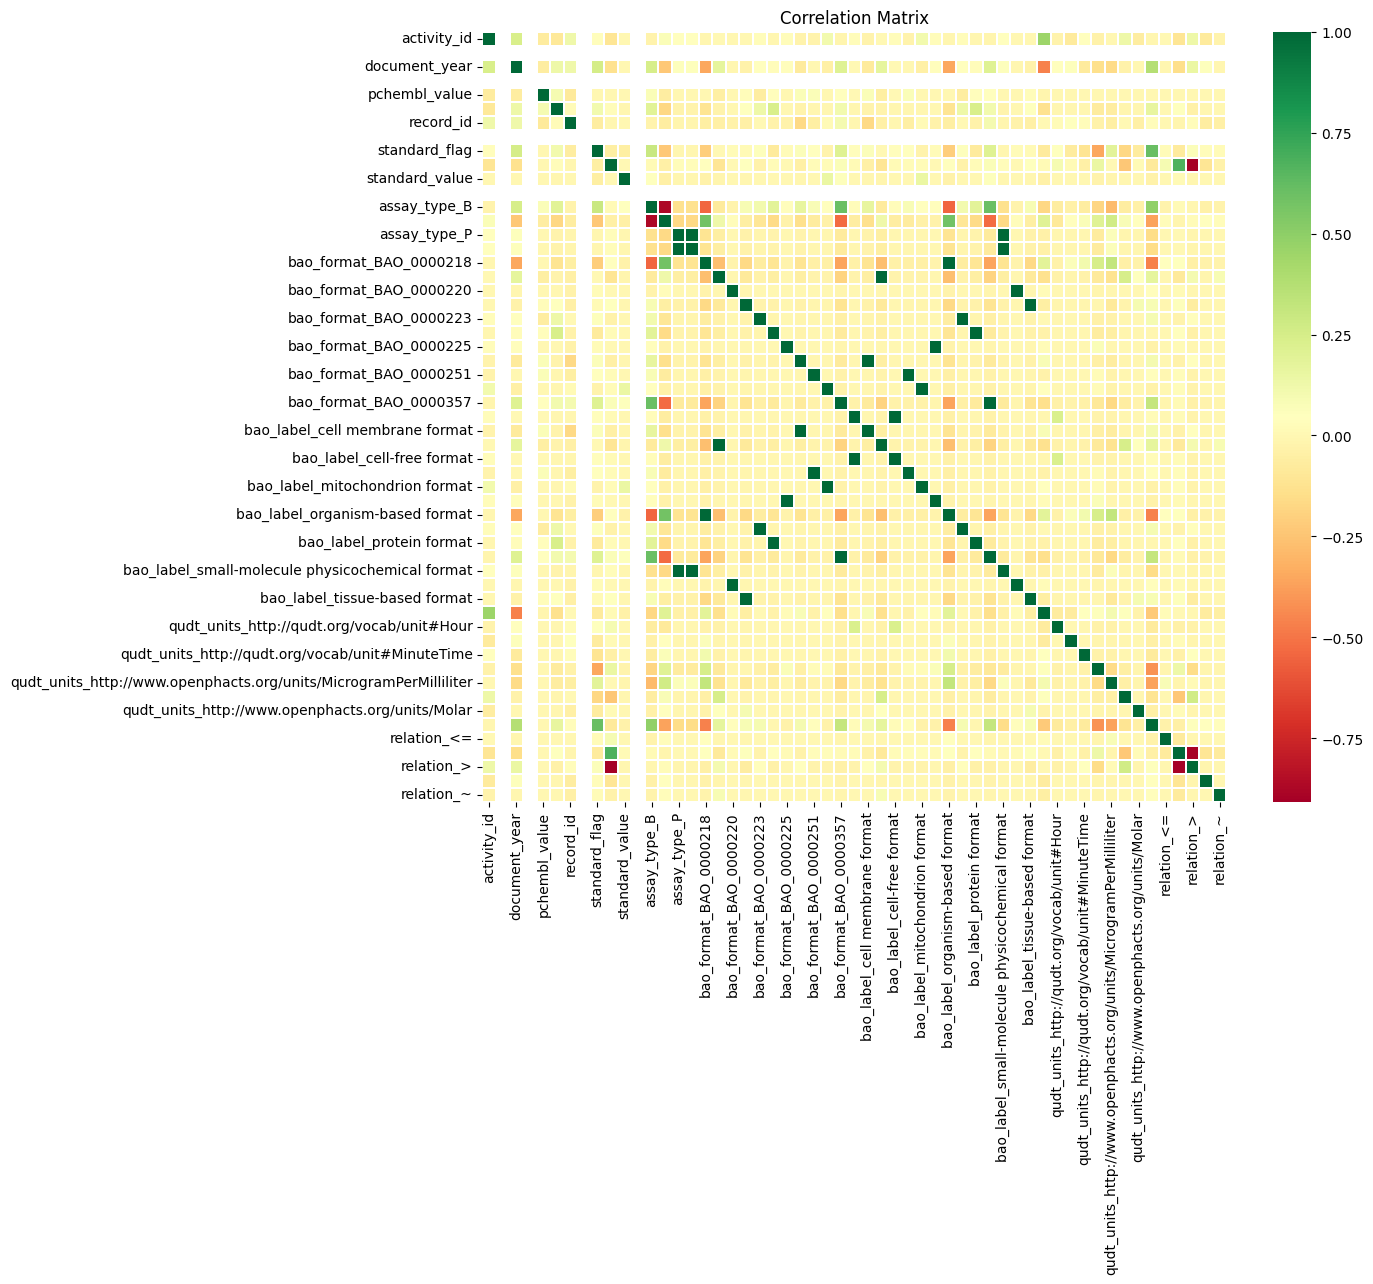

   -> Wyświetlono heatmapę korelacji.

   Pary cech o korelacji powyżej 0.8:
bao_format_BAO_0000100  bao_label_small-molecule physicochemical format    1.000000
bao_format_BAO_0000252  bao_label_mitochondrion format                     1.000000
bao_format_BAO_0000218  bao_label_organism-based format                    1.000000
bao_format_BAO_0000219  bao_label_cell-based format                        1.000000
bao_format_BAO_0000220  bao_label_subcellular format                       1.000000
bao_format_BAO_0000221  bao_label_tissue-based format                      1.000000
bao_format_BAO_0000223  bao_label_protein complex format                   1.000000
bao_format_BAO_0000224  bao_label_protein format                           1.000000
bao_format_BAO_0000225  bao_label_nucleic acid format                      1.000000
assay_type_P            bao_label_small-molecule physicochemical format    1.000000
bao_format_BAO_0000251  bao_label_microsome format                         1.000000

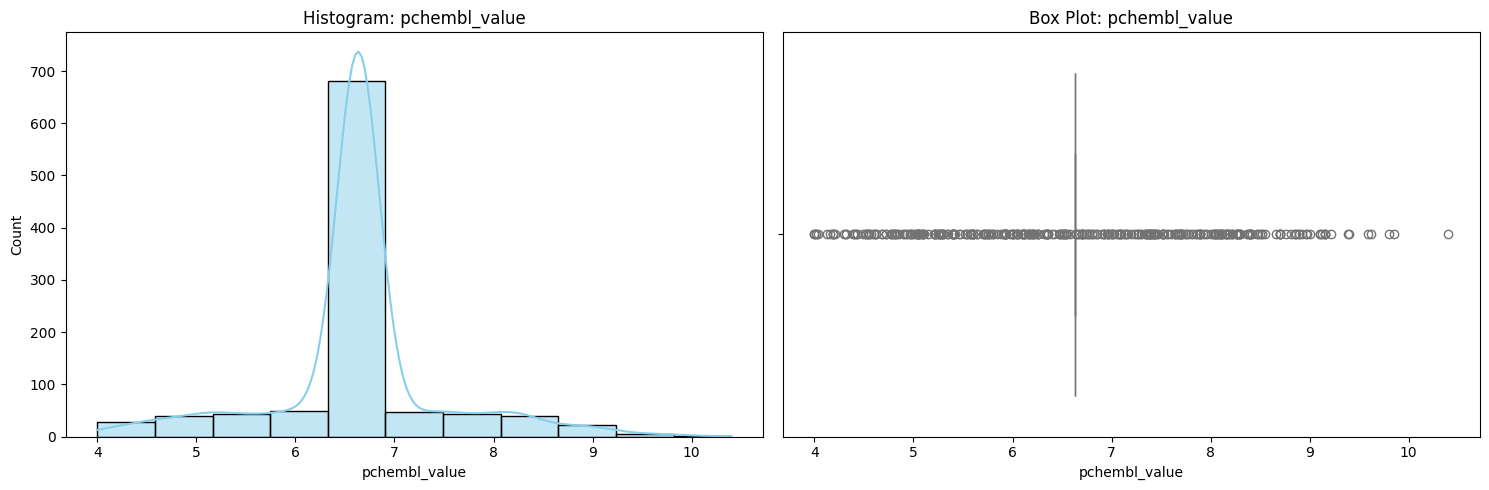

   -> Wyświetlono rozkład dla 'pchembl_value'.


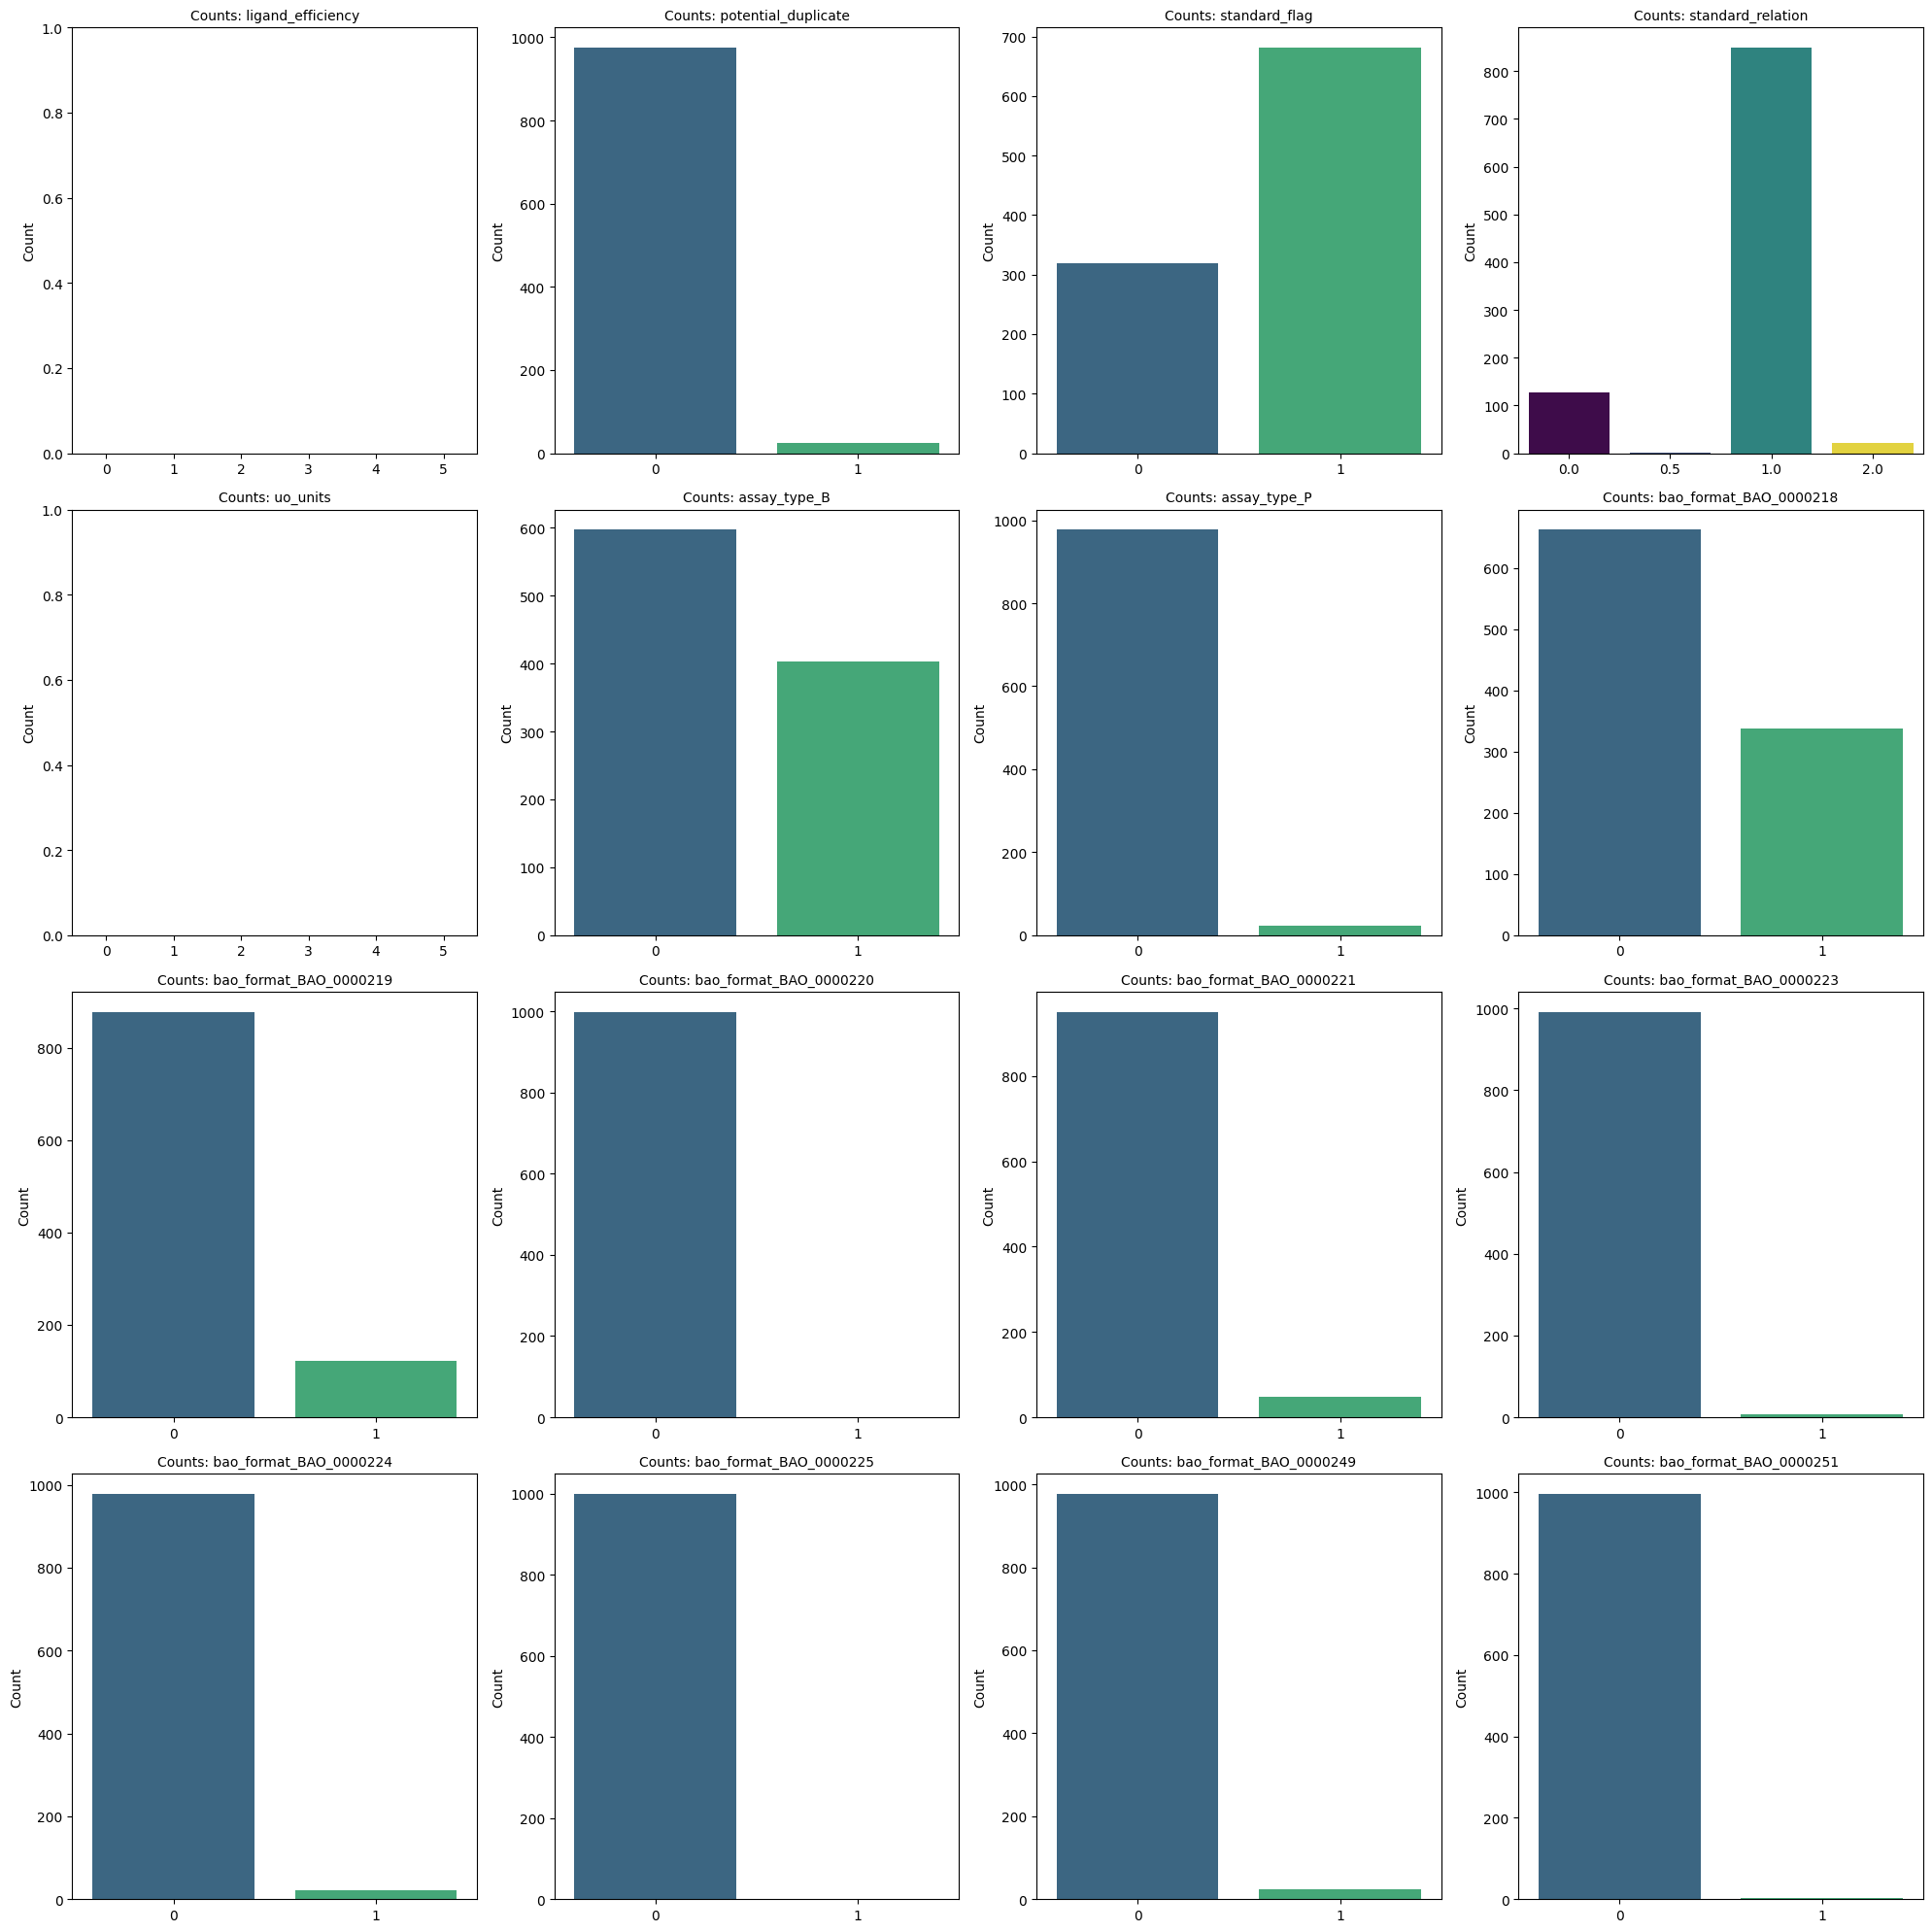

   -> Wyświetlono wykresy słupkowe dla 16 zmiennych dyskretnych.
   Wymiary (Shape): (1000, 60)
   Pierwsze 5 wierszy:
   activity_id assay_chembl_id                                  assay_description bao_endpoint  \
0        31863    CHEMBL663853  Inhibitory concentration against human DNA top...  BAO_0000190   
1        31864    CHEMBL872937  In vivo inhibitory activity against human Hepa...  BAO_0000190   
2        31865    CHEMBL693237  In vivo concentration required against angioge...  BAO_0000190   
3        31866    CHEMBL872937  In vivo inhibitory activity against human Hepa...  BAO_0000190   
4        31868    CHEMBL760688  Inhibitory activity against Palmitoyl-CoA oxid...  BAO_0000190   

                                    canonical_smiles  data_validity_comment document_chembl_id  document_year  ligand_efficiency  \
0           c1ccc(-c2nc3c(-c4nc5ccccc5o4)cccc3o2)cc1                   -1.0      CHEMBL1137930           2004                NaN   
1  Cc1ccc2oc(-c3cccc(N4C(=O)

In [53]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 145)
main()